In [39]:
%matplotlib inline

import os
import pandas as pd

from ram import config

import matplotlib.pyplot as plt

from ram.analysis.run_manager import RunManager
from ram.analysis.run_aggregator import RunAggregator
from ram.analysis.combo_search import CombinationSearch

# View all available strategies
print(RunManager.get_strategies())
print(RunManager.get_run_names('StatArbStrategy'))

['BirdsStrategy', 'GapStrategy', 'StatArbStrategy']
['run_0021', 'run_0022', 'run_0023', 'run_0024', 'run_0025', 'run_0026', 'run_0027', 'run_0028', 'run_0029', 'run_0030', 'run_0031']


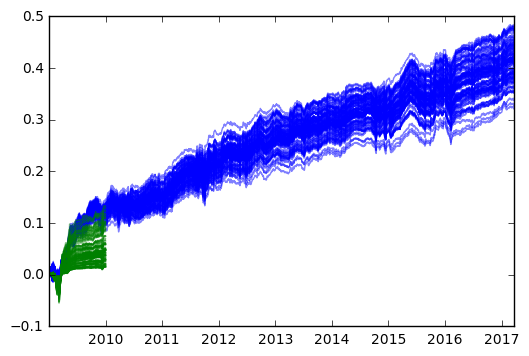

In [45]:
rm1 = RunManager('StatArbStrategy', 'run_0028', 2009)
rm2 = RunManager('StatArbStrategy', 'run_0031', 2009)

rm1.import_return_frame()
rm2.import_return_frame()

plt.figure()
plt.plot(rm1.returns.cumsum(), 'b', alpha=.5)
plt.plot(rm2.returns.cumsum(), 'g', alpha=.5)
plt.show()

In [31]:
comb = CombinationSearch()
comb.add_run(rm1)
#comb.add_run(rm2)
#comb.add_run(rm3)
comb.start(10)

100%|██████████████████████████████████████████| 10/10 [02:09<00:00, 13.28s/it]


In [37]:
x1 = rm1.returns
x2 = comb.best_results_rets.dropna()
x1 = x1.loc[x2.index]

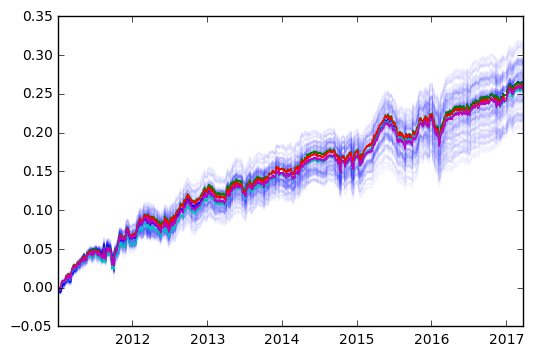

In [38]:
plt.figure()
plt.plot(x1.cumsum(), 'b', alpha=.05)
plt.plot(x2.cumsum())
plt.show()

In [2]:
rm1.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe,avg_holding_days,avg_perc_gain,avg_rebalance_count,max_holding_days,max_perc_gain,max_rebalance_count,min_perc_gain,total_trades
0,max_holding_days,10,54,0.282229,0.085291,7.133467,0.001255,0.005132,10.000000,0.144346,0.897829,-0.109048,2654.619413
1,max_holding_days,30,54,0.278523,0.087003,9.734155,0.001608,0.012244,29.408046,0.139616,1.228608,-0.123912,2025.318008
2,max_pos_prop,0.04,36,0.250449,0.080703,8.298741,0.001270,0.008920,19.712644,0.145718,1.083333,-0.117268,2372.684866
3,max_pos_prop,0.08,36,0.290785,0.088645,8.481916,0.001485,0.008650,19.703065,0.140851,1.053640,-0.115792,2327.210728
4,max_pos_prop,0.12,36,0.299894,0.089093,8.520775,0.001540,0.008494,19.696360,0.139374,1.052682,-0.116381,2320.010536
5,n_pairs,100,36,0.303715,0.089026,8.920003,0.001600,0.009864,19.615900,0.103871,0.859195,-0.094881,731.567050
6,n_pairs,300,36,0.273271,0.085135,8.389984,0.001390,0.008556,19.745211,0.151749,1.128352,-0.123522,2320.152299
7,n_pairs,500,36,0.264142,0.084279,7.991446,0.001304,0.007644,19.750958,0.170322,1.202107,-0.131038,3968.186782
8,pos_perc_deviation,0.14,108,0.280376,0.086147,8.433811,0.001432,0.008688,19.704023,0.141981,1.063218,-0.116480,2339.968710
9,remove_earnings,True,108,0.280376,0.086147,8.433811,0.001432,0.008688,19.704023,0.141981,1.063218,-0.116480,2339.968710


In [3]:
rm2.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe,avg_holding_days,avg_perc_gain,avg_rebalance_count,max_holding_days,max_perc_gain,max_rebalance_count,min_perc_gain,total_trades
0,max_holding_days,10,48,0.280676,0.083560,6.567102,0.001156,0.020645,10.000000,0.134152,1.319684,-0.121155,1898.990661
1,max_holding_days,30,48,0.301514,0.090345,8.200088,0.001460,0.037074,28.560345,0.133722,1.721264,-0.136748,1577.341954
2,max_pos_prop,0.03,48,0.271389,0.083729,7.164046,0.001193,0.029226,19.297414,0.137864,1.556753,-0.128904,1776.618534
3,max_pos_prop,0.06,48,0.310801,0.090176,7.603144,0.001423,0.028493,19.262931,0.130010,1.484195,-0.128999,1699.714080
4,n_pairs,100,32,0.298576,0.087583,7.741789,0.001371,0.032009,19.141164,0.115223,1.406250,-0.115060,838.667026
5,n_pairs,200,32,0.288858,0.086775,7.349370,0.001294,0.028130,19.295259,0.136704,1.537716,-0.132643,1738.270474
6,n_pairs,300,32,0.285852,0.086499,7.059625,0.001259,0.026439,19.404095,0.149884,1.617457,-0.139151,2637.561422
7,pos_perc_deviation,0.1,96,0.291095,0.086953,7.383595,0.001308,0.028859,19.280172,0.133937,1.520474,-0.128951,1738.166307
8,remove_earnings,False,48,0.281362,0.083096,7.932970,0.001350,0.033175,19.447557,0.136464,1.553879,-0.135827,1625.862069
9,remove_earnings,True,48,0.300828,0.090809,6.834220,0.001266,0.024544,19.112787,0.131410,1.487069,-0.122076,1850.470546


In [17]:
# ~~~~~~ RunAggregator ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
ra = RunAggregator()

# ra.add_run(rm1)
ra.add_run(rm1)
ra.add_run(rm3)

returns = ra.aggregate_returns()

In [24]:
returns.iloc[700:].mean() * 252

StatArbStrategy_run_0028_0      0.029027
StatArbStrategy_run_0028_1      0.030036
StatArbStrategy_run_0028_2      0.027379
StatArbStrategy_run_0028_3      0.030215
StatArbStrategy_run_0028_4      0.026101
StatArbStrategy_run_0028_5      0.027883
StatArbStrategy_run_0028_6      0.028664
StatArbStrategy_run_0028_7      0.029015
StatArbStrategy_run_0028_8      0.029033
StatArbStrategy_run_0028_9      0.033658
StatArbStrategy_run_0028_10     0.029184
StatArbStrategy_run_0028_11     0.032883
StatArbStrategy_run_0028_12     0.027350
StatArbStrategy_run_0028_13     0.033926
StatArbStrategy_run_0028_14     0.028921
StatArbStrategy_run_0028_15     0.034886
StatArbStrategy_run_0028_16     0.029530
StatArbStrategy_run_0028_17     0.035710
StatArbStrategy_run_0028_18     0.029372
StatArbStrategy_run_0028_19     0.035463
StatArbStrategy_run_0028_20     0.028476
StatArbStrategy_run_0028_21     0.034875
StatArbStrategy_run_0028_22     0.029201
StatArbStrategy_run_0028_23     0.034815
StatArbStrategy_

In [42]:
df = pd.DataFrame({'Rets': rm3.returns['26']}).reset_index()
df.columns = ['Date', 'Rets']

In [43]:
df['TIndex'] = ['{}{}'.format(x.year, (x.month-1)/3+1) for x in df.Date]
df['Year'] = [x.year for x in df.Date]

In [44]:
df.groupby('Year')['Rets'].sum()

Year
2009    0.114857
2010    0.016594
2011    0.060064
2012    0.040255
2013    0.037326
2014    0.021170
2015    0.040347
2016    0.021810
2017    0.017267
Name: Rets, dtype: float64

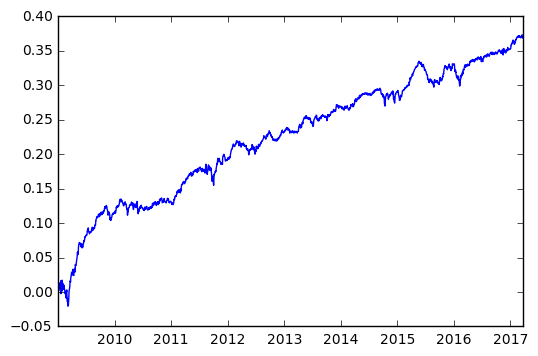

In [47]:
df2 = df.set_index('Date')

plt.figure()
plt.plot(df2.Rets.cumsum())